<a href="https://colab.research.google.com/github/tmbern/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module3-dimensionality-reduction/Copy_of_LS_DS_133_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:

a = []
b = []

for x in range(-10,15,1):
  y = x**2
  a.append(x)
  b.append(y)




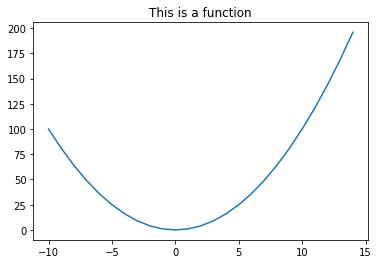

In [0]:
#graph of a function that passes the vertical line test

fig, ax = plt.subplots()
ax.plot(a, b)
plt.title('This is a function')

plt.show()

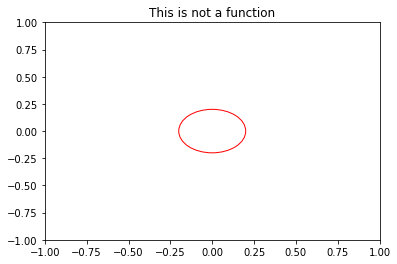

In [0]:
circle = plt.Circle((0, 0), .2, color="red", fill=False, clip_on=False)

fig, ax = plt.subplots()

ax.add_artist(circle)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title('This is not a function')

plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

A function has only one output for each input value. In the case of a graph that doesnt pass the vertical line test we can think of the inputs as the x value and the output as the y value. for each x value there can be multiple y values. thus the output can have more than one value for the same input. This violates the concept of a function only having one out put for each input value. 

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

relation 2. all the other relations have a set that has a different y(second value) for the same x value in the set. eg. relation 1: 1 has an output of 2 and 3. 

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

for function n: the domain has a dimensionality of 3 and codomain of 3

for function m: the domain has a dimensionality of 4 and codomain of 2 

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes: below function


\begin{align}p(𝑥_1,𝑥_2)=(x_1^2, x_1x_2, 2x_2)
\end{align}

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

###Function P

\\

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\ 
- x_1 + 2 x_2 \\  \end{bmatrix}\end{align}

\\

\begin{align}
\\
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = x_1\begin{bmatrix} 1 \\ 0 \end{bmatrix} + x_2\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\end{align}

\\

\begin{align}
f(\begin{bmatrix} 1 \\ 0 \end{bmatrix}) = \begin{bmatrix} 1 \\ -1 \end{bmatrix}
\\
f(\begin{bmatrix} 0 \\ 1 \end{bmatrix}) = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

\\

\begin{align}
T = \begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}
\end{align}


###Test with an input matrix


\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\ 
- x_1 + 2 x_2 \\  \end{bmatrix}\end{align}

\\

\begin{align}
\\
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = x_1\begin{bmatrix} 1 \\ 0 \end{bmatrix} + x_2\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\end{align}

\\

\begin{align}
f(\begin{bmatrix} 2 \\ 1 \end{bmatrix}) = \begin{bmatrix} 5 \\ 0 \end{bmatrix}
\\
\end{align}


###Function Q

\\begin{align}
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\- x_1 + 2 x_2  + 3x_3 \\ 5x_1  + x_2 - 2x_3  \end{bmatrix}
\end{align}

\\

\begin{align}
\\
\begin{bmatrix} x_1 \\ x_2 \\ x_3\end{bmatrix} = x_1\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + x_2\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + x_3\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\\
\end{align}

\\

\begin{align}
f(\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}) = \begin{bmatrix} 4 \\ -1 \\ 5\end{bmatrix}
\\
f(\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}) = \begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix}
\\
f(\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}) = \begin{bmatrix} 2 \\ 3 \\ -2 \end{bmatrix}
\end{align}

\\
\begin{align}
T = \begin{bmatrix} 4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1 & -2 \end{bmatrix}
\end{align}



\\

##Test with input matrix


\\begin{align}
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\- x_1 + 2 x_2  + 3x_3 \\ 5x_1  + x_2 - 2x_3  \end{bmatrix}
\end{align}

\\

\begin{align}
f(\begin{bmatrix} 2 \\ 1 \\ 1 \end{bmatrix}) = \begin{bmatrix} 11 \\ 3 \\ 9\end{bmatrix}
\\
\end{align}


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
## verify the the transformation by dot product of transformation matrices

t = [[1,3], [-1,2]]
test = [2, 1]

np.dot(t, test)




array([5, 0])

In [0]:
t_2 = [[4, 1, 2], [-1, 2, 3], [5, 1, -2]]

test_2 = [2, 1, 1]

np.dot(t_2, test_2)

array([11,  3,  9])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

when a transformation occurs the eigen vector is a vector that changes only by a scalar factor. There will not be any rotations or anything the change will only be a lengthening or shortening of the vector by a scalar. The eigenvalue is the factor that the eigenvector is scaled by.     

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Can run the risk of overfitting models

there are difficulties in clustering observations to see patterns



## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

general rule is that you should have 5x the number of observations as you do parameters

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [3]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [4]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

CONTROL            object
AGE1                int64
METRO3             object
REGION             object
LMED                int64
                    ...  
FMTINCRELAMICAT    object
FMTASSISTED        object
FMTBURDEN          object
FMTREGION          object
FMTSTATUS          object
Length: 99, dtype: object

In [5]:
# check for null values
national.isnull().sum().any()

False

In [6]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [7]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

CONTROL            category
AGE1                  int64
METRO3             category
REGION             category
LMED                  int64
                     ...   
FMTINCRELAMICAT    category
FMTASSISTED        category
FMTBURDEN          category
FMTREGION          category
FMTSTATUS          category
Length: 99, dtype: object

In [8]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,0,82,2,0,73738,956,15738,26213,40322,11067,2,2006,0,1,40000,-6,1,1,6,3117.394239,1,18021,1,533,1,0,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,1,0,5,1,2,0,4,4,4,4,3,1,1,1,1,1,1,1,1,1,2,0,2,0,0
1,1,50,4,2,55846,1100,17165,28604,45744,24218,4,1980,0,1,130000,-6,1,1,6,2150.725544,4,122961,1,487,1,0,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,1,0,3,1,4,0,3,4,4,3,4,2,2,2,1,3,3,3,5,3,7,0,1,0,0
2,2,53,4,2,55846,1100,13750,22897,36614,15470,4,1985,0,1,150000,-6,1,1,7,2213.789404,2,27974,1,1405,1,0,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,1,0,3,1,4,0,4,4,4,4,3,2,2,2,1,2,3,4,5,3,4,0,3,0,0
3,3,67,4,2,55846,949,13750,22897,36614,13964,3,1985,0,1,200000,-6,1,1,6,2364.585097,2,32220,1,279,1,0,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,1,0,3,1,3,0,4,4,4,4,4,2,2,2,2,2,5,6,6,4,4,0,1,0,0
4,4,26,0,2,60991,737,14801,24628,39421,15492,2,1980,0,1,-6,-6,2,100,4,2314.524902,2,96874,1,759,5,1,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,1,1,3,5,2,1,3,3,3,3,4,2,2,2,2,3,2,2,2,2,7,1,1,0,0


In [9]:
# Now we only ahve numeric columns (ints and floats)
national_processed.dtypes

CONTROL            int32
AGE1               int64
METRO3              int8
REGION              int8
LMED               int64
                   ...  
FMTINCRELAMICAT     int8
FMTASSISTED         int8
FMTBURDEN           int8
FMTREGION           int8
FMTSTATUS           int8
Length: 99, dtype: object

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

In [10]:
### Your Code Here

from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#standardize the Data
scaler = StandardScaler()

#use scalar to fit_transfomr the data
Z = scaler.fit_transform(national_processed)

#create PCA instance

pca = PCA()

#fit on data
pca.fit(Z)

#access values and vectors
pca.components_
pca.explained_variance_

#transform data
B = pca.transform(Z)
print("\n Projected Data: \n", B)


 Projected Data: 
 [[-2.57657018e+00 -1.37612732e+00 -1.25383508e+00 ... -3.72424507e-17
   3.67541478e-17  0.00000000e+00]
 [ 2.04064284e+00 -9.88061441e-01 -2.23799949e+00 ... -8.28321810e-17
   4.09284510e-16  0.00000000e+00]
 [ 1.21527025e+00  3.70168163e-01 -3.24860582e+00 ...  7.49055751e-16
   2.18118510e-16  0.00000000e+00]
 ...
 [ 1.83162816e+00 -2.95570213e+00  5.28543479e+00 ...  3.51376804e-16
   1.54796326e-16  0.00000000e+00]
 [-5.02514474e+00 -2.52857814e+00 -1.02019576e-01 ... -2.37605926e-16
  -6.06918488e-16  0.00000000e+00]
 [-9.89816404e+00 -8.02842666e-01 -3.53506324e+00 ...  2.05169716e-16
  -2.18844886e-16  0.00000000e+00]]


In [11]:
 
df_B = pd.DataFrame(B)

df_B.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98
0,-2.576570,-1.376127,-1.253835,-0.619882,1.592855,-2.529629,-1.024384,2.038971,0.743631,-0.981357,-0.958024,-0.983633,-0.124320,2.130272,-0.232511,-1.259668,-1.811215,0.800230,0.157496,0.057891,0.076233,-0.303851,0.234631,0.311692,1.414847,0.665575,0.206075,0.297168,-0.885343,-1.100812,0.017568,-0.296827,-0.045226,0.328718,-0.227059,-0.206567,0.105183,0.209632,-0.452949,0.487132,...,-0.022755,-0.005380,0.017097,0.017509,0.007771,-0.001771,-0.005635,0.002438,0.000044,-1.560361e-12,-2.277077e-12,-7.242113e-12,-2.795351e-12,1.373502e-13,2.899793e-12,-1.396600e-12,5.031310e-12,-1.451706e-12,8.481819e-17,9.524272e-16,5.168272e-17,-8.338726e-17,-3.645024e-16,8.492261e-17,-6.222504e-16,1.465679e-16,1.841878e-17,-3.813348e-16,-4.044924e-16,6.599287e-17,5.655265e-16,2.114880e-16,-6.750893e-16,-6.952525e-16,-1.171650e-16,-6.244074e-17,-1.727434e-16,-3.724245e-17,3.675415e-17,0.0
1,2.040643,-0.988061,-2.237999,-2.987403,2.160320,1.220875,1.076368,-0.681369,0.948055,-0.182382,-0.690309,0.670541,-0.312950,0.160716,0.063940,-0.032742,-1.310611,-0.029583,-0.320912,-1.213295,0.082541,-0.438037,-0.140961,-0.417153,0.129375,-0.373254,0.162462,0.426850,-0.294672,1.196620,0.034442,0.739189,-0.334534,-0.349723,-0.051191,0.107043,0.952603,0.199457,0.022768,0.199969,...,-0.065489,0.030766,-0.021506,-0.014176,0.010088,0.000578,-0.010665,-0.002009,-0.000083,1.985503e-11,1.696739e-11,-1.820463e-11,-4.568840e-12,-8.938972e-12,-1.002130e-11,3.035041e-12,-1.878946e-12,-7.527095e-12,4.685656e-16,-5.562080e-16,-4.505784e-16,3.383873e-16,-2.018761e-16,2.210086e-16,2.119384e-16,-2.258892e-16,4.160005e-16,5.571971e-16,1.093916e-16,-1.681332e-16,-9.805863e-18,-4.415298e-16,1.137681e-16,-1.904986e-16,-1.185672e-16,1.324673e-16,-4.713731e-16,-8.283218e-17,4.092845e-16,0.0
2,1.215270,0.370168,-3.248606,-2.123899,1.229951,-2.559945,0.984291,0.088488,-0.209300,-0.715159,-0.243996,1.168680,-0.136100,0.491252,0.358669,-0.462415,-1.494570,0.114951,-0.160159,-0.889462,0.678651,-0.002222,0.162761,-0.738769,-0.844579,0.332651,-0.014602,0.525549,-0.134705,0.832489,-0.366875,0.429854,-0.639612,-0.112777,-0.114059,0.258893,0.974611,0.167855,0.177374,-0.033658,...,-0.037108,0.019828,-0.032203,0.003294,0.006182,0.000272,-0.008307,0.000210,0.000053,-3.011547e-11,-3.448317e-11,-2.704562e-12,-1.343215e-11,3.055475e-11,-1.853681e-11,6.517715e-12,1.170878e-11,2.918100e-11,5.114780e-16,-4.196937e-16,4.278268e-16,-4.912517e-16,5.251804e-16,-5.221105e-16,-2.901619e-16,1.403775e-16,8.267054e-16,7.336866e-17,1.330838e-16,4.265692e-16,2.700908e-16,-4.683963e-16,5.877623e-17,-3.197594e-16,-2.792367e-16,5.900722e-17,-1.559745e-16,7.490558e-16,2.181185e-16,0.0
3,2.821837,1.723711,-4.375157,-1.479343,0.085327,-1.755050,0.710440,-0.064843,0.487051,-0.175074,-0.947811,0.273949,-0.083829,-0.606772,-0.058791,0.293943,-1.319074,1.225816,-0.688633,-0.437567,-0.155818,-0.934189,0.070781,0.082882,0.259157,-0.305200,-0.157419,0.136505,-0.678651,0.363593,-0.497262,0.453585,0.099106,0.302715,-0.319196,0.502472,-0.056209,0.043986,0.284494,0.152548,...,0.051131,-0.016479,0.032716,-0.001735,-0.006142,-0.000083,0.003233,0.000369,0.000047,1.570992e-11,-2.955718e-11,-4.246079e-11,-3.625682e-11,-3.904295e-11,-8.908407e-12,2.530021e-12,7.073106e-12,3.749479e-13,6.889951e-16,-1.699880e-16,1.184372e-15,-1.414496e-16,3.276507e-16,-1.913601e-16,-4.107119e-16,2.098357e-16,-3.721625e-17,-6.608116e-17,-1.188354e-17,2.939130e-17,5.617494e-17,-2.005675e-16,1.295229e-16,-2.362493e-16,-2.966576e-16,3.637921e-16,6.209578e-17,1.751248e-16,5.402790e-16,0.0
4,-1.570106,-0.878362,-3.307062,0.785881,-2.310400,3.881736,-0.645952,0.464725,-0.092147,0.439502,0.680427,1.297333,-2.176527,0.873973,-1.258729,0.078789,-1.274484,-1.278863,-0.049121,-1.107579,-1.315707,0.183007,-0.463981,-0.126541,-0.6328

In [12]:
names = []

for i in range(0, len(df_B.columns), 1):
  names.append('PC'+ str(i)) 
 
df_B = pd.DataFrame(B, columns=names)

df_B.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,...,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98
0,-2.576570,-1.376127,-1.253835,-0.619882,1.592855,-2.529629,-1.024384,2.038971,0.743631,-0.981357,-0.958024,-0.983633,-0.124320,2.130272,-0.232511,-1.259668,-1.811215,0.800230,0.157496,0.057891,0.076233,-0.303851,0.234631,0.311692,1.414847,0.665575,0.206075,0.297168,-0.885343,-1.100812,0.017568,-0.296827,-0.045226,0.328718,-0.227059,-0.206567,0.105183,0.209632,-0.452949,0.487132,...,-0.022755,-0.005380,0.017097,0.017509,0.007771,-0.001771,-0.005635,0.002438,0.000044,-1.560361e-12,-2.277077e-12,-7.242113e-12,-2.795351e-12,1.373502e-13,2.899793e-12,-1.396600e-12,5.031310e-12,-1.451706e-12,8.481819e-17,9.524272e-16,5.168272e-17,-8.338726e-17,-3.645024e-16,8.492261e-17,-6.222504e-16,1.465679e-16,1.841878e-17,-3.813348e-16,-4.044924e-16,6.599287e-17,5.655265e-16,2.114880e-16,-6.750893e-16,-6.952525e-16,-1.171650e-16,-6.244074e-17,-1.727434e-16,-3.724245e-17,3.675415e-17,0.0
1,2.040643,-0.988061,-2.237999,-2.987403,2.160320,1.220875,1.076368,-0.681369,0.948055,-0.182382,-0.690309,0.670541,-0.312950,0.160716,0.063940,-0.032742,-1.310611,-0.029583,-0.320912,-1.213295,0.082541,-0.438037,-0.140961,-0.417153,0.129375,-0.373254,0.162462,0.426850,-0.294672,1.196620,0.034442,0.739189,-0.334534,-0.349723,-0.051191,0.107043,0.952603,0.199457,0.022768,0.199969,...,-0.065489,0.030766,-0.021506,-0.014176,0.010088,0.000578,-0.010665,-0.002009,-0.000083,1.985503e-11,1.696739e-11,-1.820463e-11,-4.568840e-12,-8.938972e-12,-1.002130e-11,3.035041e-12,-1.878946e-12,-7.527095e-12,4.685656e-16,-5.562080e-16,-4.505784e-16,3.383873e-16,-2.018761e-16,2.210086e-16,2.119384e-16,-2.258892e-16,4.160005e-16,5.571971e-16,1.093916e-16,-1.681332e-16,-9.805863e-18,-4.415298e-16,1.137681e-16,-1.904986e-16,-1.185672e-16,1.324673e-16,-4.713731e-16,-8.283218e-17,4.092845e-16,0.0
2,1.215270,0.370168,-3.248606,-2.123899,1.229951,-2.559945,0.984291,0.088488,-0.209300,-0.715159,-0.243996,1.168680,-0.136100,0.491252,0.358669,-0.462415,-1.494570,0.114951,-0.160159,-0.889462,0.678651,-0.002222,0.162761,-0.738769,-0.844579,0.332651,-0.014602,0.525549,-0.134705,0.832489,-0.366875,0.429854,-0.639612,-0.112777,-0.114059,0.258893,0.974611,0.167855,0.177374,-0.033658,...,-0.037108,0.019828,-0.032203,0.003294,0.006182,0.000272,-0.008307,0.000210,0.000053,-3.011547e-11,-3.448317e-11,-2.704562e-12,-1.343215e-11,3.055475e-11,-1.853681e-11,6.517715e-12,1.170878e-11,2.918100e-11,5.114780e-16,-4.196937e-16,4.278268e-16,-4.912517e-16,5.251804e-16,-5.221105e-16,-2.901619e-16,1.403775e-16,8.267054e-16,7.336866e-17,1.330838e-16,4.265692e-16,2.700908e-16,-4.683963e-16,5.877623e-17,-3.197594e-16,-2.792367e-16,5.900722e-17,-1.559745e-16,7.490558e-16,2.181185e-16,0.0
3,2.821837,1.723711,-4.375157,-1.479343,0.085327,-1.755050,0.710440,-0.064843,0.487051,-0.175074,-0.947811,0.273949,-0.083829,-0.606772,-0.058791,0.293943,-1.319074,1.225816,-0.688633,-0.437567,-0.155818,-0.934189,0.070781,0.082882,0.259157,-0.305200,-0.157419,0.136505,-0.678651,0.363593,-0.497262,0.453585,0.099106,0.302715,-0.319196,0.502472,-0.056209,0.043986,0.284494,0.152548,...,0.051131,-0.016479,0.032716,-0.001735,-0.006142,-0.000083,0.003233,0.000369,0.000047,1.570992e-11,-2.955718e-11,-4.246079e-11,-3.625682e-11,-3.904295e-11,-8.908407e-12,2.530021e-12,7.073106e-12,3.749479e-13,6.889951e-16,-1.699880e-16,1.184372e-15,-1.414496e-16,3.276507e-16,-1.913601e-16,-4.107119e-16,2.098357e-16,-3.721625e-17,-6.608116e-17,-1.188354e-17,2.939130e-17,5.617494e-17,-2.005675e-16,1.295229e-16,-2.362493e-16,-2.966576e-16,3.637921e-16,6.209578e-17,1.751248e-16,5.402790e-16,0.0
4,-1.570106,-0.878362,-3.307062,0.785881,-2.310400,3.881736,-0.645952,0.464725,-

In [0]:
import seaborn as sns


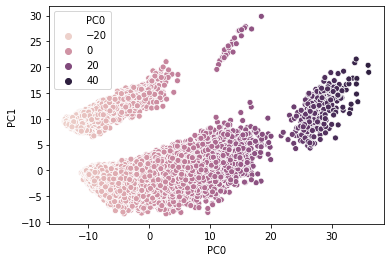

In [15]:
sns.scatterplot(x=df_B['PC0'], y = df_B['PC1'], hue=df_B['PC0'])

In [0]:
from numpy import array
from numpy import mean
from numpy import std
from numpy import cov
from numpy.linalg import eig

# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)